In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_signal(signal: np.array, domain:str, title: str):

    max_amp = np.max(signal)


    x_label = domain
    if domain == 'time':
        y_label = 'Amplitude'
        title = 'Time Domain Signal'
    elif domain == 'frequency':
        y_label = 'Magnitude'
        title = 'Frequency Domain Signal'
        signal = np.abs(signal)

    plt.ylim(0, 2 * max_amp)
    plt.stem(signal)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

def show_image(image: np.array, title: str):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()

def Conv1D(signal: np.array, kernel: np.array):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length, dtype=np.float32)
    
    zero_padded = np.zeros(output_length, dtype=np.float32)
    zero_padded[:signal_length] = signal.astype(np.float32)

    sliding_window = np.concatenate([np.zeros(kernel_length-1), zero_padded])

    flipped_kernel = np.flip(kernel).astype(np.float32)
    
    for i in range(output_length):
        output[i] = np.dot(sliding_window[i:i+kernel_length], flipped_kernel)
    
    return output

Actual Output length:  12
Expected Output length:  12
Actual Output:  [1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]
[1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]


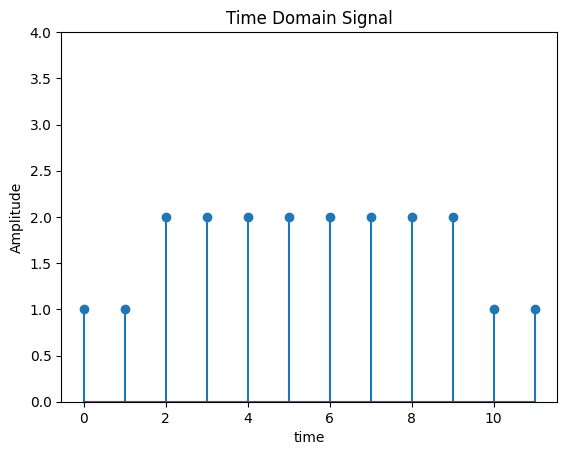

In [15]:
input_array = np.array([1,1,1,1,1,1,1,1,1,1])
transfer_kernel = np.array([1,0,1])

output_array = Conv1D(input_array, transfer_kernel)

print("Actual Output length: ", len(output_array))
print("Expected Output length: ", len(input_array) + len(transfer_kernel) - 1)

print("Actual Output: ", output_array)

print(output_array)

plot_signal(output_array, 'time', 'Input Signal')

[1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]


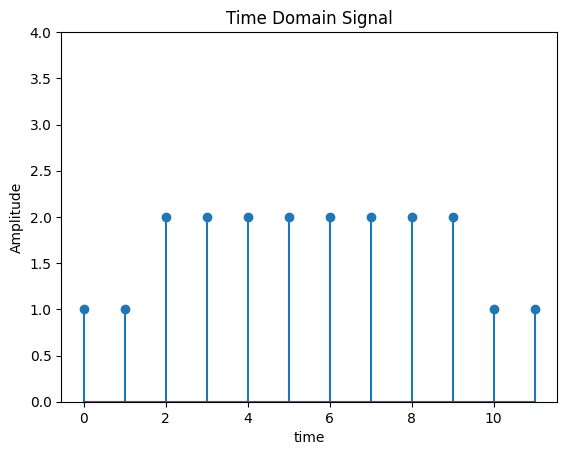

In [4]:
n_pad = len(input_array) + len(transfer_kernel) - 1


padded_input = np.pad(input_array, (0, n_pad - len(input_array)))
padded_transfer = np.pad(transfer_kernel, (0, n_pad - len(transfer_kernel)))

INPUT_FFT = np.fft.fft(padded_input)
TRANSFER_FFT = np.fft.fft(padded_transfer)

OUTPUT_FFT = INPUT_FFT * TRANSFER_FFT

output_array_fft = np.real(np.fft.ifft(OUTPUT_FFT))

print(output_array_fft)

plot_signal(output_array_fft, 'time', 'Output Signal')

In [5]:
import os

from PIL import Image   


notebook_dir = os.path.abspath("")

images_dir = os.path.join(os.path.abspath(os.path.join(notebook_dir,"data", "test_images")))

print(images_dir)

list_images = os.listdir(images_dir)
i = 0
for image_name in list_images:
    print(f"image {i}: {image_name}\n")
    i += 1


/home/yasin/Projects/computer-vision-analysis/data/test_images
image 0: tree.bmp

image 1: palm.bmp

image 2: pale_blue_dot.tif

image 3: pepper.bmp

image 4: BoatsColor.bmp

image 5: boats.bmp

image 6: fbtaraftar.bmp

image 7: airplane.bmp

image 8: goldhill.bmp

image 9: baboon.bmp

image 10: landscape.bmp

image 11: barbara.bmp

image 12: lenna.bmp

image 13: low_contrast_lenna.bmp



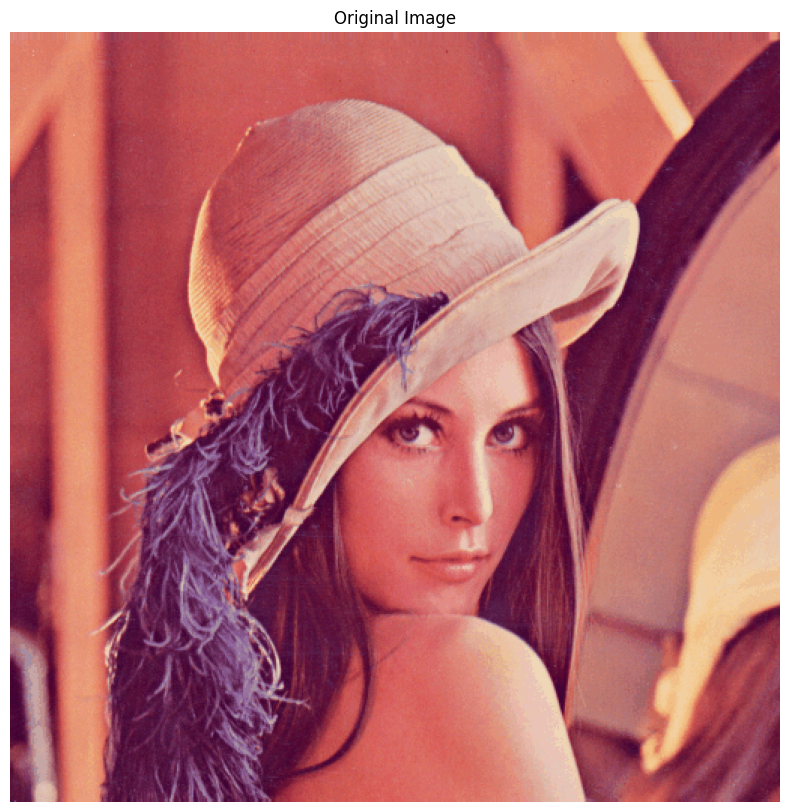

In [7]:
image = Image.open(os.path.join(images_dir, list_images[12]))


show_image(np.array(image), 'Original Image')

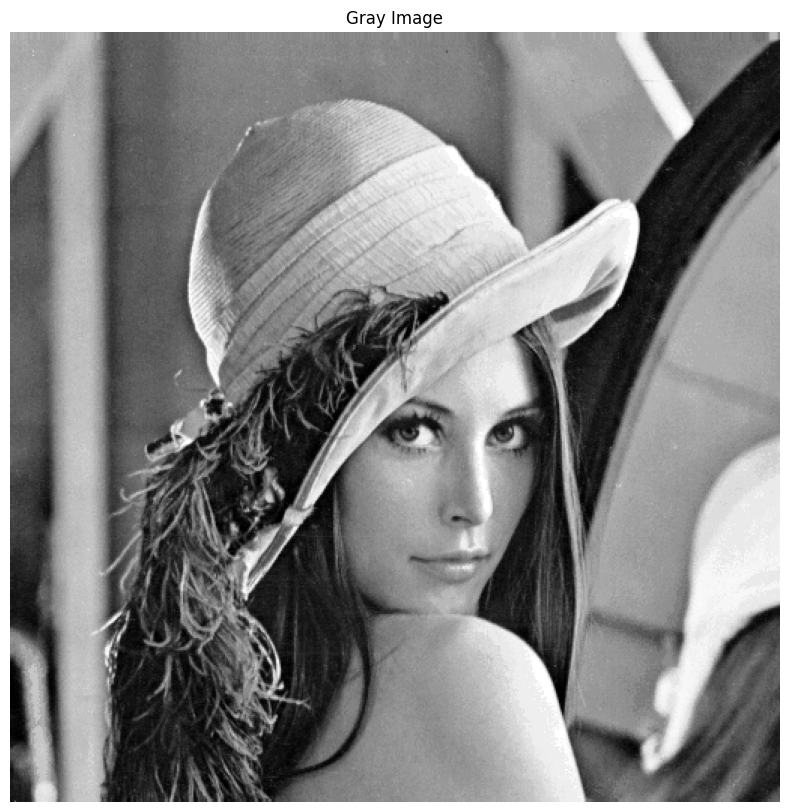

In [10]:
gray_image = image.convert('L')

show_image(np.array(gray_image), 'Gray Image')

In [11]:
np_image = np.array(gray_image).astype(np.float32)


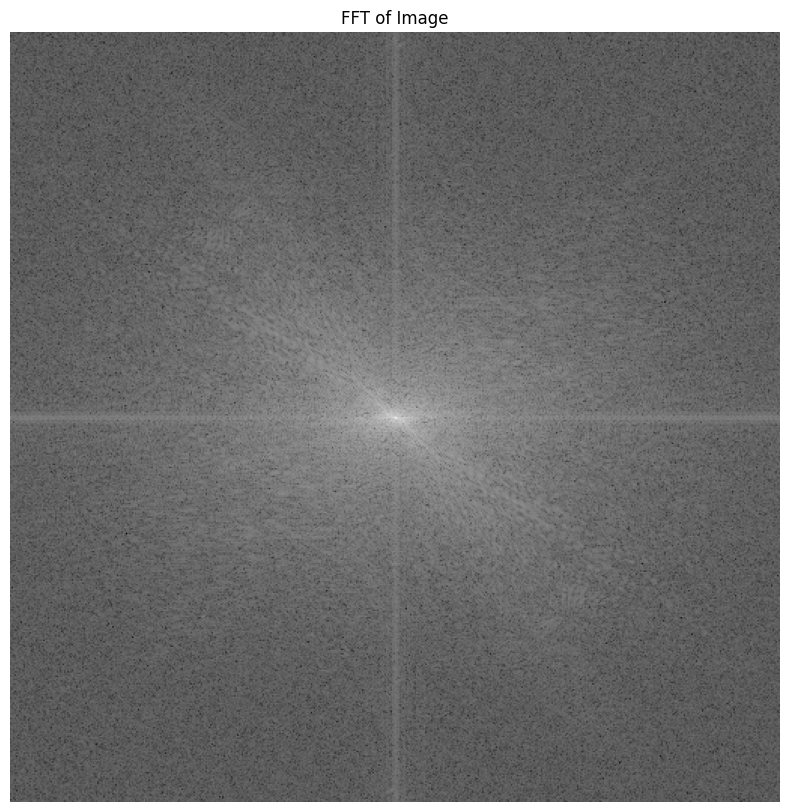

In [12]:

transformed_image = np.zeros_like(np_image)

for x in range(np_image.shape[0]):
    for y in range(np_image.shape[1]):
        transformed_image[x,y] = np_image[x,y] * (-1)**(x+y)



fft = np.fft.fft2(transformed_image)

image = np.abs(fft)

nlog_image = np.log(1 + image)

show_image(nlog_image, 'FFT of Image')

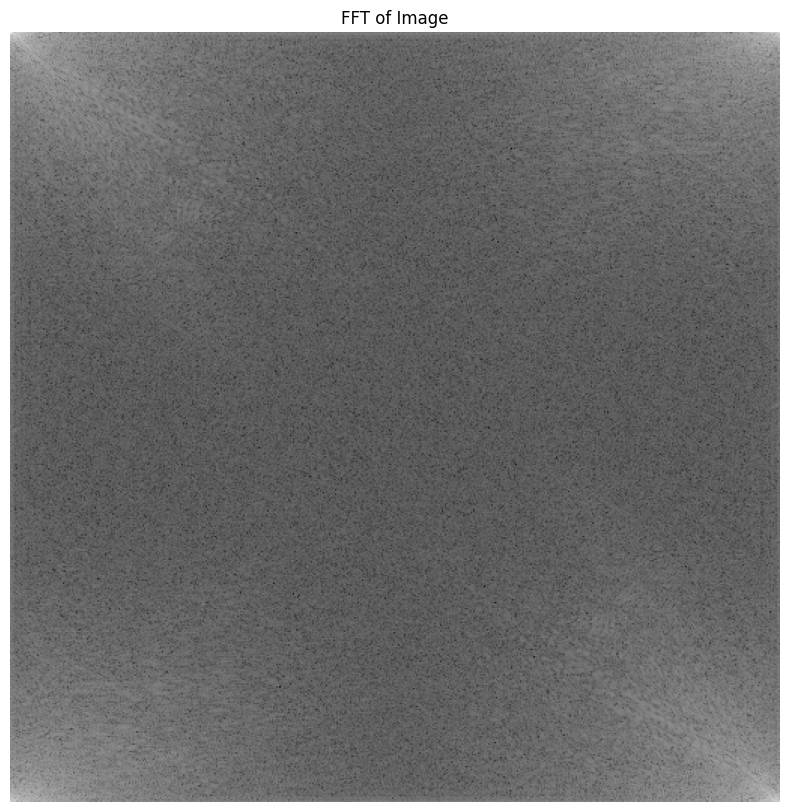

In [13]:
fft = np.fft.fft2(np_image)

transformed_fft = np.zeros_like(fft)


for u in range(fft.shape[0]):
    for v in range(fft.shape[1]):
        transformed_fft[u,v] = fft[u,v] * (-1)**(u+v)


nlog_image = np.log(1 + np.abs(transformed_fft))

show_image(nlog_image, 'FFT of Image')

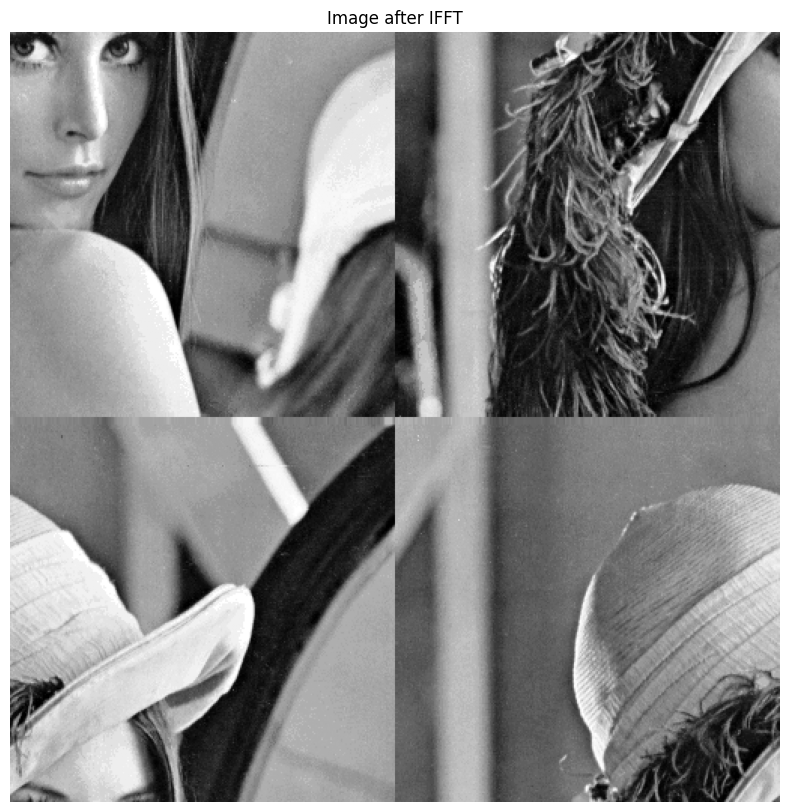

In [14]:
ifft = np.fft.ifft2(transformed_fft)

np_image = np.real(ifft)
##plot image wittout axis

show_image(np_image, 'Image after IFFT')

In [18]:
# Giriş sinyali ve transfer fonksiyonu tanımlama
signal = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # 10 elemanlı giriş sinyali
kernel = np.array([1, 0, 1])                        # Transfer fonksiyonu (kernel)

# Zaman uzayında konvolüsyon işlemi
convolution_output = Conv1D(signal, kernel)
print("Zaman Uzayında Konvolüsyon Çıktısı:\t\t", convolution_output)

# FFT için padding uzunluğu hesaplama
# Çıktı uzunluğu = sinyal uzunluğu + kernel uzunluğu - 1
padding_length = len(signal) + len(kernel) - 1

# Sinyal ve kernel'i padding ile genişletme
padded_signal = np.pad(signal, (0, padding_length - len(signal)))
padded_kernel = np.pad(kernel, (0, padding_length - len(kernel)))

# Fourier dönüşümlerini hesaplama
signal_fft = np.fft.fft(padded_signal)
kernel_fft = np.fft.fft(padded_kernel)

# Frekans uzayında çarpım
frequency_product = signal_fft * kernel_fft

# Ters FFT ile zaman uzayına dönüş
convolution_from_fft = np.real(np.fft.ifft(frequency_product))

print("Frekans Uzayı Çarpımının Ters FFT Çıktısı:\t", convolution_from_fft)

Zaman Uzayında Konvolüsyon Çıktısı:		 [1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]
Frekans Uzayı Çarpımının Ters FFT Çıktısı:	 [1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]
